# Question 1
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
snkr_shop = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
## Check the data's general format and its shape
snkr_shop

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [4]:
## Check if the data type is right for each column
## Check if the dataset contains null value
snkr_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


# a, 
## Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


In [5]:
## Check the general data value for order amount.
## max value is 704000 which is unusual.
snkr_shop['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

<AxesSubplot:xlabel='order_amount'>

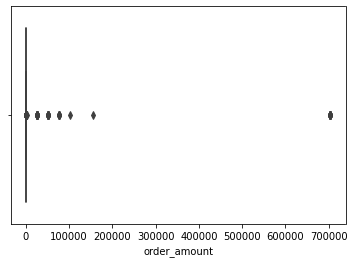

In [6]:
## Complementary for the describe above, Boxplot it and check the outlier values
sns.boxplot(snkr_shop['order_amount'])

In [7]:
## Check the total amount for each data point.
## The maximum is 2000 while the mean is only 8.78 and the third quartile value is only 3.
snkr_shop['total_items'].describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

<AxesSubplot:xlabel='total_items'>

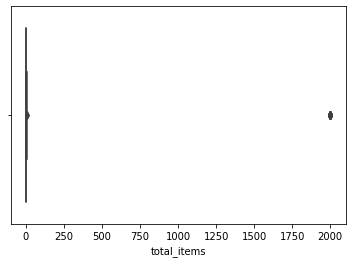

In [8]:
## Complementary for the describe of total_items above
sns.boxplot(snkr_shop['total_items'])

In [9]:
## Check the Average shoe value for each order to see if there's still some very large value for single pair of shoe
## The maximum value for a single shoe is 25725 which is very large.
snkr_shop['avg_amount'] = snkr_shop['order_amount']/snkr_shop['total_items']
snkr_shop['avg_amount'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: avg_amount, dtype: float64

<AxesSubplot:xlabel='avg_amount'>

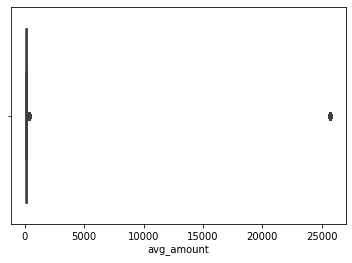

In [10]:
sns.boxplot(snkr_shop['avg_amount'])

### Error Analysis
As we can see above, the way Shopify calculates the Average Order Value (AOV) is simply by adding up the values of 5,000 data points and dividing by 5,000. \
The problem is that the order amount may represent the amount of 1 pair of shoes, or the amount of 2,000 pairs.
And the maximum order amount is **704000**, the maximum order amount is **2000**.\
Besides that, after I divide the order amount by total items, there are still some extreme large values like **25725**. From the question we can see that Shopify has exactly 100 sneaker shops and each of those shops sells only one model of shoe.\
The average order value and the single shoe value could vary a lot from running shoe to leather shoe or high heels.

## b, What metric would you report for this dataset?


### Btter Way to Evaluate AOV

A better way to evaluate this metric is to **delete the outliers** first, we could see that the maximum order amounts is 704000 and the maximum total items is 2000 while the mean value for total items is only 8.78. Also, the price varies a lot from shop to shop, we could evaluate the **AOV by different shops** after remove its outlier w.r.t each shop.

## c, what is its value?

In [11]:
snkr_shop[(np.abs(stats.zscore(snkr_shop['total_items'])) < 3)]['total_items'].describe()

count    4983.00000
mean        1.99398
std         0.98318
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max         8.00000
Name: total_items, dtype: float64

In [12]:
## Remove the outlier by calculate the z score for total_items. Only keep z score less than 3
## The reason that not calculate the z score by order amount is that we know some shops might sell 
## expensive shoe that will be removed by the z score
snkr_shop = snkr_shop[(np.abs(stats.zscore(snkr_shop['total_items'])) < 3)]


In [13]:
snkr_shop

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_amount
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


In [14]:
aov_each_shop = snkr_shop.groupby('shop_id')['order_amount'].mean().reset_index()

## The AOV Value for each shop is the dataframe below

In [15]:
aov_each_shop['order_amount'].describe()
## We could see that the means is much more reasonable.

count      100.000000
mean       792.341539
std       4891.366502
min        162.857143
25%        263.675962
50%        308.889758
75%        336.628352
max      49213.043478
Name: order_amount, dtype: float64

In [16]:
## This is the average order value for each shop
pd.set_option('display.max_rows', None)
aov_each_shop

,shop_id,order_amount
0,1,308.818182
1,2,174.327273
2,3,305.250000
3,4,258.509804
4,5,290.311111
5,6,383.508475
6,7,218.000000
7,8,241.043478
8,9,234.000000
9,10,332.301887


# Question 2

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.


## a, How many orders were shipped by Speedy Express in total?


```sql
SELECT COUNT(OrderID)
FROM Orders 
LEFT JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID 
WHERE Shippers.ShipperName = 'Speedy Express'
```

`= 54`

## b, What is the last name of the employee with the most orders?

```sql
SELECT LastName
FROM Employees
LEFT JOIN Orders
ON Employees.EmployeeID = Orders.EmployeeID
GROUP BY Orders.EmployeeID
ORDER BY COUNT(*) DESC
LIMIT 1
```

`= Peacock`

## c, What product was ordered the most by customers in Germany?

This question is not very clear. I'm not sure if the **ordered the most** refers to the total quantities the customer ordered or just the number of times the customer ordered. So I will give the answer for both assumption.

## Assumption1: the most ordered refers to the number of times the customer ordered.
```sql
SELECT ProductName
FROM Products
JOIN OrderDetails
ON Products.ProductID = OrderDetails.ProductID 
JOIN Orders
ON OrderDetails.OrderID = Orders.OrderID
JOIN Customers
ON Orders.CustomerID = Customers.CustomerID
WHERE Country = 'Germany'
GROUP BY Products.ProductID
ORDER BY COUNT(*) DESC
LIMIT 1
```

`= Gorgonzola Telino`

## Assumption1: the most ordered refers to the total quantity of the product that the customer ordered 
```sql
SELECT ProductName
FROM Products
JOIN OrderDetails
ON Products.ProductID = OrderDetails.ProductID 
JOIN Orders
ON OrderDetails.OrderID = Orders.OrderID
JOIN Customers
ON Orders.CustomerID = Customers.CustomerID
WHERE Country = 'Germany'
GROUP BY Products.ProductID
ORDER BY SUM(OrderDetails.Quantity) DESC
LIMIT 1
```

`= Boston Crab Meat`